/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.54      0.03      0.06       223
           1       0.76      0.99      0.86       677

    accuracy                           0.75       900
   macro avg       0.65      0.51      0.46       900
weighted avg       0.70      0.75      0.66       900

ROC-AUC: 0.6357711083585589


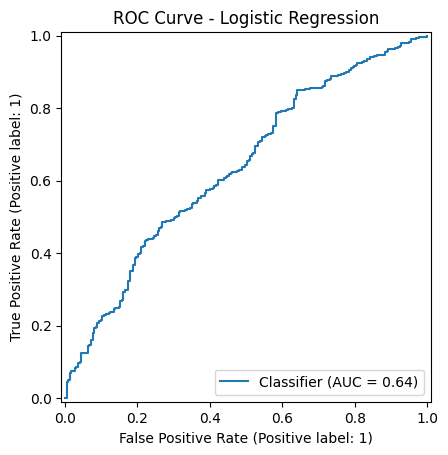

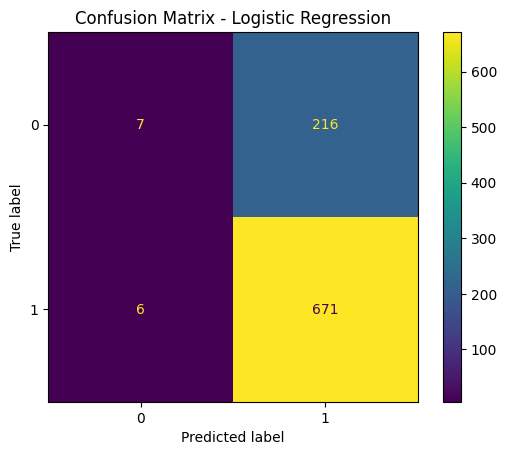


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.28      0.11      0.15       223
           1       0.76      0.91      0.82       677

    accuracy                           0.71       900
   macro avg       0.52      0.51      0.49       900
weighted avg       0.64      0.71      0.66       900

ROC-AUC: 0.57267289744388


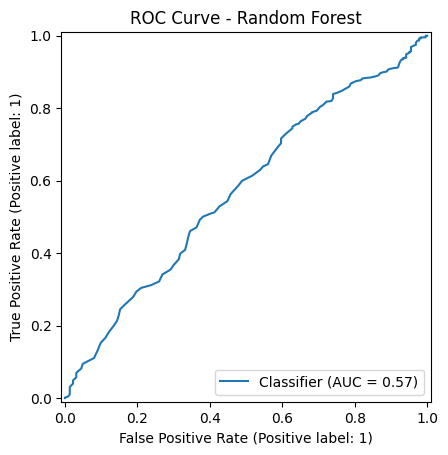

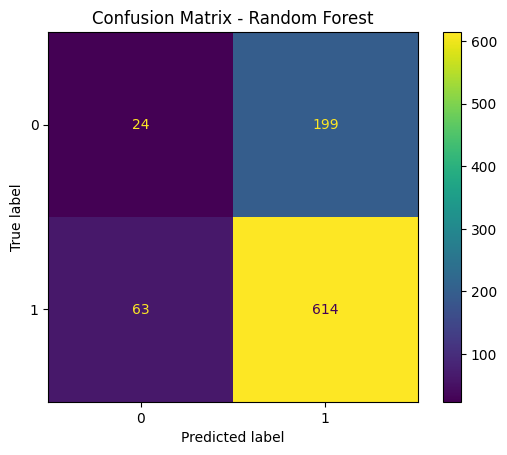

In [ ]:
# Credit Risk Analysis - Loan Approval Prediction

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset OR generate synthetic if missing
try:
    df = pd.read_csv("loan.csv")  # download from Kaggle Loan Prediction dataset
    target = "Loan_Status"
    df[target] = df[target].map({"Y":1,"N":0})
except:
    rng = np.random.default_rng(42)
    n = 3000
    df = pd.DataFrame({
        "ApplicantIncome": rng.normal(5000,2000,n).clip(500,20000),
        "CoapplicantIncome": rng.normal(2000,1000,n).clip(0,15000),
        "LoanAmount": rng.normal(150,60,n).clip(20,600),
        "Credit_History": rng.choice([0,1],n,p=[0.2,0.8]),
        "Education": rng.choice(["Graduate","Not Graduate"],n,p=[0.7,0.3]),
        "Property_Area": rng.choice(["Urban","Semiurban","Rural"],n,p=[0.4,0.4,0.2]),
    })
    # synthetic target
    score = (0.00008*df["ApplicantIncome"] - 0.001*df["LoanAmount"] + 1.2*df["Credit_History"])
    prob = 1/(1+np.exp(-score))
    df["Loan_Status"] = (rng.uniform(0,1,n)<prob).astype(int)
    target = "Loan_Status"

X = df.drop(columns=[target])
y = df[target]

num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
], remainder="passthrough")

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=200,random_state=42)
}

for name,model in models.items():
    pipe = Pipeline([("pre",pre),("clf",model)])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:,1]
    print(f"\n=== {name} ===")
    print(classification_report(y_test,y_pred))
    print("ROC-AUC:",roc_auc_score(y_test,y_prob))
    RocCurveDisplay.from_predictions(y_test,y_prob)
    plt.title(f"ROC Curve - {name}")
    plt.show()
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
